In [1]:
from facenet_models import FacenetModel

# this will download the pretrained weights (if they haven't already been fetched)
# which should take just a few seconds
model = FacenetModel()

# detect all faces in an image
# returns a tuple of (boxes, probabilities, landmarks)
# assumes ``pic`` is a numpy array of shape (R, C, 3) (RGB is the last dimension)


In [76]:
import numpy as np
class Profile:
    def __init__(self, name: str, descriptor):
        self.name = name
        self.descriptors = [descriptor]
        
       

    def add_descriptor(self, descriptor):
        if(len(descriptor)==0):
            self.descriptors.append(descriptor)
        else:
            self.descriptors = np.vstack([self.descriptors, descriptor])
            
        
    
    
        
        

In [77]:
import pickle

def load_db(path="fb.pickle"):
    try:
        with open(path, mode="rb") as opened_file:
            return pickle.load(opened_file)
    except FileNotFoundError:
        return {}
    

    


In [78]:
def add_face(descriptors, name, db):
    if name in db:
        profile = db[name]
        profile.add_descriptor(descriptors)
        db[name] = profile
        
    else:
        profile = Profile(name=name,descriptor=descriptors)
        db[name] = profile

    
    with open("fb.pickle", "wb") as opened_file:
        pickle.dump(db, opened_file)
    

In [100]:
def remove_face(name, db):
    del face_db[name]
    with open("fb.pickle", "wb") as opened_file:
        pickle.dump(db, opened_file)


In [101]:
face_db = load_db() 

[ WARN:0@3847.635] global /private/var/folders/k1/30mswbxs7r1g6zwn8y4fyt500000gp/T/abs_11nitadzeg/croot/opencv-suite_1691620374638/work/modules/videoio/src/cap_gstreamer.cpp (862) isPipelinePlaying OpenCV | GStreamer warning: GStreamer: pipeline have not been created


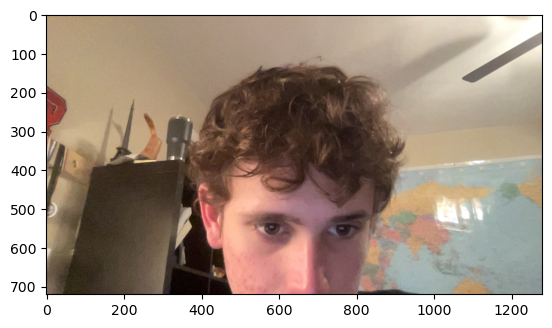

In [158]:
from camera import take_picture
import matplotlib.pyplot as plt
img_array = take_picture()
fig,ax = plt.subplots()
ax.imshow(img_array)

# detect all faces in an image
# returns a tuple of (boxes, probabilities, landmarks)
# assumes ``pic`` is a numpy array of shape (R, C, 3) (RGB is the last dimension)
boxes, probabilities, landmarks = model.detect(img_array)

# producing a face descriptor for each face
# returns a (N, 512) array, where N is the number of boxes
# and each descriptor vector is 512-dimensional



descriptors = model.compute_descriptors(img_array, boxes)
names=["Gordie","Andrew"]

for i, descriptor in enumerate(descriptors):
    add_face(descriptor, names[i], face_db) 
    





In [157]:
for name, profile in face_db.items():
    print(f"Name: {name}")
    print(f"Descriptors: {profile.descriptors}")

Name: Gordie
Descriptors: [[-0.04865345 -0.09115991 -0.0537564  ... -0.03492288 -0.01756651
   0.02094268]
 [-0.00426273 -0.08436324 -0.01842717 ...  0.05130795 -0.0081613
  -0.0384164 ]
 [-0.04638989 -0.11474384 -0.06125571 ... -0.03268084 -0.04227018
   0.00994906]
 [-0.04301775 -0.09816544 -0.07610555 ... -0.0142338  -0.00188512
   0.00533016]]
Name: Andrew
Descriptors: [array([-4.01527509e-02, -4.01973948e-02, -1.94996793e-03,  7.67936632e-02,
        3.62363793e-02,  7.72226974e-02, -1.48925651e-03,  3.05970162e-02,
       -4.16006520e-02, -1.30915949e-02,  3.14643905e-02,  2.54554991e-02,
        4.86166915e-03,  4.53357510e-02, -1.90542601e-02,  4.01721895e-02,
       -1.56661682e-02,  5.03066108e-02, -4.64860909e-02, -5.41046076e-02,
       -7.54055977e-02,  5.64562753e-02, -1.34705650e-02,  3.06284036e-02,
        4.38576750e-02, -5.50253876e-02,  1.14329148e-03,  4.33017835e-02,
        1.27648897e-02, -5.93568012e-02, -2.73113046e-02, -2.66035255e-02,
        3.38493250e-02,

In [153]:
def cos_distances(d1,d2):

    d1_norm=np.linalg.norm(d1,axis=0,keepdims=False)
    print(d2)
    d2_norm=np.linalg.norm(d2,axis=0,keepdims=False)
    print(d2_norm)
    
    return 1 - (d1_norm @ d2_norm.T)
    

In [154]:
cos_distances(face_db["Andrew"].descriptors,face_db["Gordie"].descriptors)

[[-0.04865345 -0.09115991 -0.0537564  ... -0.03492288 -0.01756651
   0.02094268]
 [-0.00426273 -0.08436324 -0.01842717 ...  0.05130795 -0.0081613
  -0.0384164 ]
 [-0.04638989 -0.11474384 -0.06125571 ... -0.03268084 -0.04227018
   0.00994906]]
[0.06735986 0.16909592 0.08355581 0.10718384 0.05829023 0.00953213
 0.07827781 0.10989872 0.07087984 0.02980294 0.08597076 0.13202724
 0.0385777  0.05588002 0.05721358 0.22775102 0.07606614 0.01641697
 0.07061653 0.02815187 0.03450706 0.05175611 0.08775663 0.01657036
 0.0185754  0.07595744 0.10939611 0.0181517  0.09060977 0.069402
 0.09276903 0.11058205 0.02487098 0.10510793 0.1281129  0.0344428
 0.06313079 0.08550551 0.05006278 0.09375727 0.0375271  0.08581464
 0.04201228 0.1306533  0.11483273 0.15772706 0.07776796 0.06004912
 0.12457731 0.07610486 0.04454494 0.07829306 0.03925851 0.02067938
 0.12020454 0.05716591 0.10039929 0.06785245 0.08983938 0.0137267
 0.0782066  0.02880173 0.06323004 0.15537025 0.16767955 0.08375727
 0.02787233 0.03658654 0

-0.2273726463317871